Imagine que as redes neurais são como especialistas em diferentes áreas. Cada especialista é bom para resolver um tipo específico de problema.

Neste script, vamos conhecer 4 "especialistas" diferentes:

FNN (Feedforward Neural Network): O especialista básico.

CNN (Convolutional Neural Network): O especialista em visão (imagens).

RNN (Recurrent Neural Network): O especialista em sequências (texto, tempo).

Reinforcement Learning (RL): O especialista que aprende por tentativa e erro.

Parte 1: Redes Neurais de Fluxo Direto (FNN) - O Básico
Analogia: O FNN é como um processo de decisão simples e unidirecional. As informações fluem de uma camada para a próxima, sem nunca voltar. É perfeito para problemas em que cada dado de entrada é independente do anterior.

Caso de Uso: Classificar objetos com base em características fixas, como determinar se um e-mail é spam ou não.

In [3]:
# =================================================================
# 1. Configuração e Exemplo de FNN
# =================================================================

# Importando bibliotecas
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

print("Parte 1: Exemplo de FNN com o dataset Iris")
print("-" * 50)

# Carregando um dataset clássico: a flor Iris
iris = load_iris()
X, y = iris.data, iris.target

# Dividindo os dados para treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizando os dados (uma boa prática)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Criando o modelo FNN
model_fnn = keras.Sequential([
    # Camada de entrada (input_shape define o formato dos dados)
    keras.layers.Input(shape=(X_train.shape[1],)),
    # Camada densa com 32 neurônios
    keras.layers.Dense(32, activation='relu'),
    # Camada de saída com 3 neurônios (uma para cada tipo de flor)
    keras.layers.Dense(3, activation='softmax')
])

# Compilando e treinando o modelo
model_fnn.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

model_fnn.fit(X_train, y_train, epochs=10, verbose=0)
loss, accuracy = model_fnn.evaluate(X_test, y_test, verbose=0)

print(f"Acurácia do modelo FNN: {accuracy:.4f}\n")

Parte 1: Exemplo de FNN com o dataset Iris
--------------------------------------------------
Acurácia do modelo FNN: 0.9000



Parte 2: Redes Neurais Convolucionais (CNN) - Para o Mundo Visual
Analogia: O CNN é como um detetive visual. Em vez de olhar para a imagem inteira de uma vez, ele escaneia a imagem em pequenas partes (como um microscópio) para encontrar padrões, como bordas, texturas e formas. Depois, ele junta esses padrões para identificar o que está na imagem.

Caso de Uso: Classificação de imagens, detecção de objetos em fotos, reconhecimento facial.

Parte 2: Exemplo de CNN com o dataset Fashion-MNIST
--------------------------------------------------
29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Acurácia do modelo CNN: 0.8625


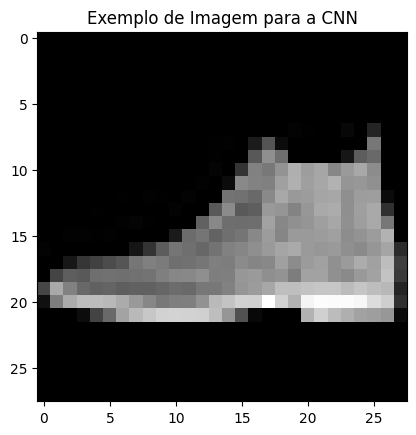

In [4]:
# =================================================================
# 2. Configuração e Exemplo de CNN
# =================================================================

import matplotlib.pyplot as plt

print("Parte 2: Exemplo de CNN com o dataset Fashion-MNIST")
print("-" * 50)

# Carregando o dataset de imagens de roupas
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Preparando os dados para o modelo
train_images = train_images.reshape(-1, 28, 28, 1) / 255.0
test_images = test_images.reshape(-1, 28, 28, 1) / 255.0

# Criando o modelo CNN
model_cnn = keras.Sequential([
    # Camada Convolucional: encontra padrões na imagem
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    # Camada de Pooling: reduz a imagem, mantendo apenas os padrões mais importantes
    keras.layers.MaxPooling2D((2, 2)),
    # Outra camada convolucional
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    # "Achatando" os dados para que possam ser processados por uma camada FNN
    keras.layers.Flatten(),
    # Camada densa
    keras.layers.Dense(64, activation='relu'),
    # Camada de saída com 10 classes (uma para cada tipo de roupa)
    keras.layers.Dense(10, activation='softmax')
])

# Compilando e treinando o modelo
model_cnn.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

model_cnn.fit(train_images, train_labels, epochs=1, verbose=0) # Treinando por apenas 1 época para ser rápido

loss, accuracy = model_cnn.evaluate(test_images, test_labels, verbose=0)
print(f"Acurácia do modelo CNN: {accuracy:.4f}")

# Mostrando um exemplo de imagem
plt.figure()
plt.imshow(test_images[0].reshape(28, 28), cmap='gray')
plt.title("Exemplo de Imagem para a CNN")
plt.show()

Parte 3: Redes Neurais Recorrentes (RNN) e suas Evoluções - Para Sequências
Analogia: O RNN é como uma pessoa que lê uma frase. Para entender o significado de uma palavra, ela precisa se lembrar das palavras anteriores. O RNN tem um "laço de memória" que permite que ele se lembre de informações passadas.

Evolução (LSTM): Redes como a LSTM (Long Short-Term Memory) são uma evolução do RNN. Elas resolvem um problema comum dos RNNs: a dificuldade de se lembrar de informações que estão muito distantes no tempo (a chamada "memória de longo prazo"). A LSTM tem mecanismos para decidir o que lembrar e o que esquecer.

Caso de Uso: Tradução de idiomas, predição de texto, análise de sentimento em resenhas de filmes.

In [5]:
# =================================================================
# 3. Configuração e Exemplo de RNN (LSTM)
# =================================================================

print("\nParte 3: Exemplo de RNN (LSTM) com o dataset IMDB (resenhas de filmes)")
print("-" * 50)

# Carregando o dataset de resenhas de filmes (classificação de sentimento)
imdb = keras.datasets.imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# Preparando os dados: preenchendo as resenhas para que todas tenham o mesmo tamanho
train_data = keras.preprocessing.sequence.pad_sequences(train_data, maxlen=256)
test_data = keras.preprocessing.sequence.pad_sequences(test_data, maxlen=256)

# Criando o modelo LSTM
model_lstm = keras.Sequential([
    # Camada de embedding: converte palavras em vetores de números
    keras.layers.Embedding(10000, 16),
    # Camada LSTM: a "memória" que processa a sequência de palavras
    keras.layers.LSTM(32),
    # Camada densa de saída
    keras.layers.Dense(1, activation='sigmoid')
])

# Compilando e treinando o modelo
model_lstm.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

model_lstm.fit(train_data, train_labels, epochs=1, verbose=0) # Treinando por apenas 1 época
loss, accuracy = model_lstm.evaluate(test_data, test_labels, verbose=0)
print(f"Acurácia do modelo LSTM: {accuracy:.4f}\n")


Parte 3: Exemplo de RNN (LSTM) com o dataset IMDB (resenhas de filmes)
--------------------------------------------------
17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Acurácia do modelo LSTM: 0.8496



Parte 4: Aprendizagem por Reforço (Reinforcement Learning) - O Mundo da Ação
Analogia: O Reinforcement Learning (RL) é como um robô aprendendo a andar. Ele não é treinado com um dataset pré-existente. Em vez disso, ele explora um ambiente. Se ele cair, recebe uma "punição" (recompensa negativa). Se ele ficar de pé, recebe uma "recompensa". O objetivo é aprender a tomar as melhores ações para maximizar as recompensas ao longo do tempo.

Diferença Fundamental: Diferente das outras redes neurais (que são exemplos de aprendizagem supervisionada), o RL não tem uma "resposta correta" no início. Ele descobre a resposta sozinho por tentativa e erro.

Caso de Uso: Jogos de videogame, robótica, controle de tráfego, gestão de recursos.

In [6]:
# =================================================================
# 4. Configuração e Exemplo de Reinforcement Learning (RL)
# =================================================================

# Para este exemplo, usaremos o Gym (agora Gymnasium), uma biblioteca padrão para RL
# Ele simula ambientes de jogos para testar os agentes.

# Para instalar o Gymnasium, use a linha abaixo no Colab:
# !pip install gymnasium

import gymnasium as gym
import time
from IPython.display import clear_output

print("Parte 4: Exemplo de Reinforcement Learning com o jogo 'CartPole'")
print("-" * 50)
print("Neste jogo, um agente deve manter um mastro equilibrado em um carrinho.\nEle recebe recompensas por cada passo que o mastro fica de pé.")

# Criando o ambiente do jogo CartPole
env = gym.make('CartPole-v1', render_mode='rgb_array')
observation, info = env.reset(seed=42)

# Simulando um "agente" que toma decisões aleatórias
# Na vida real, o agente seria um modelo que aprende a melhor ação
num_episodes = 2
for episode in range(num_episodes):
    terminated = False
    truncated = False
    total_reward = 0

    while not terminated and not truncated:
        # O agente escolhe uma ação aleatória: 0 (mover para a esquerda) ou 1 (mover para a direita)
        action = env.action_space.sample()

        # O agente executa a ação e o ambiente retorna o resultado
        observation, reward, terminated, truncated, info = env.step(action)
        total_reward += reward

        # Mostrando a simulação (somente funciona em ambientes interativos como o Jupyter)
        # Se você estiver em um ambiente que não renderiza, você ainda pode ver os prints
        # print(f"Passo: {env.step_count}, Ação: {action}, Recompensa: {reward}")

    print(f"Episódio {episode + 1} finalizado. Recompensa total: {total_reward}")

env.close()

Parte 4: Exemplo de Reinforcement Learning com o jogo 'CartPole'
--------------------------------------------------
Neste jogo, um agente deve manter um mastro equilibrado em um carrinho.
Ele recebe recompensas por cada passo que o mastro fica de pé.
Episódio 1 finalizado. Recompensa total: 23.0
Episódio 2 finalizado. Recompensa total: 0.0


/usr/local/lib/python3.11/dist-packages/gymnasium/envs/classic_control/cartpole.py:214: UserWarning: WARN: You are calling 'step()' even though this environment has already returned terminated = True. You should always call 'reset()' once you receive 'terminated = True' -- any further steps are undefined behavior.
  logger.warn(
